In [52]:
# default
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [53]:
total2 = pd.read_csv('../Data/02.통합.csv', index_col=0)

In [54]:
total2.shape

(136, 13)

In [55]:
total2.tail()

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,빈집수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
131,2020,충청북도,1600837,226441,8607,40,85135,76877.0,1265,6103,591,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,26983.0,1240,6405,739,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,84106.0,1285,5554,683,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,35105.0,595,2856,398,20182.3,14025.4
135,2020,세종특별자치시,355831,65909,3468,7,29487,14385.0,208,1361,339,9864.7,251734.3


In [56]:
total2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   년도                          136 non-null    int64  
 1   시도                          136 non-null    object 
 2   총인구                         136 non-null    int64  
 3   전출인구                        136 non-null    int64  
 4   출생아수                        136 non-null    int64  
 5   산부인과의원수                     136 non-null    int64  
 6   초등학생인원수                     136 non-null    int64  
 7   빈집수                         102 non-null    float64
 8   협회 및 단체, 수리 및 기타 개인서비스업 소멸  136 non-null    int64  
 9   도매 및 소매업 신생                 136 non-null    int64  
 10  교육서비스업 소멸                   136 non-null    int64  
 11  예금은행대출금액                    136 non-null    float64
 12  예금액                         136 non-null    float64
dtypes: float64(3), int64(9), object(1)


In [57]:
# 상관 계수 막대 그래프 찍는 함수 
# a = 시작 컬럼 인덱스, b = 끝 컬럼 인덱스
def DfNameIstotal2makeCorrHeatMap(a, b):
    plt.figure(figsize = (10,6))

    sns.heatmap(
        total2.iloc[:,a:b].corr(),
        annot=True,
        annot_kws={"size": 10},
        linewidths= 0.5,
    )
    plt.show()


In [58]:

def DfNameIstotal2makeCorrHeatMapYear(a, b, c):
    plt.figure(figsize = (10,6))
    sns.heatmap(
        total2[total2['년도']==c].iloc[:,a:b].corr(),
        annot=True,
        annot_kws={"size": 10},
        linewidths= 0.5,
    )
    plt.show()  

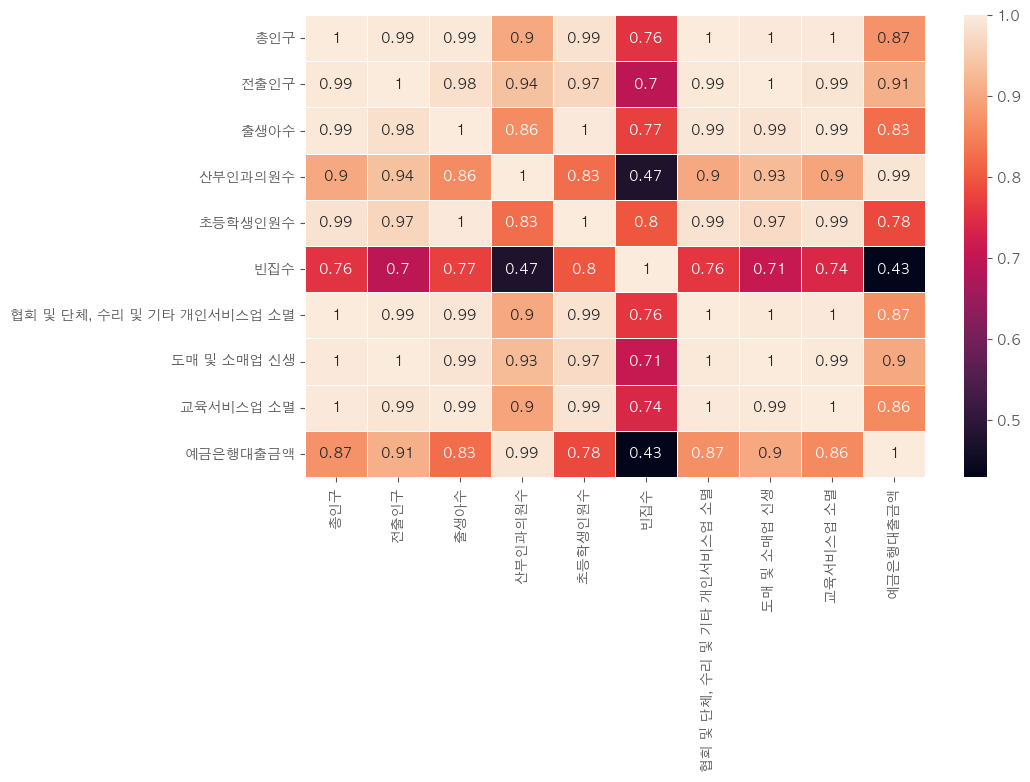

In [59]:
DfNameIstotal2makeCorrHeatMapYear(1,12,2020)

In [60]:
from sklearn.cluster import KMeans

In [61]:
print(total2[total2['빈집수'].isna()].head(1)['년도'])
print(total2[total2['빈집수'].isna()].tail(1)['년도'])

0    2013
Name: 년도, dtype: int64
33    2014
Name: 년도, dtype: int64


In [62]:
total2['시도'].unique()

array(['경기도', '서울특별시', '경상남도', '부산광역시', '대구광역시', '인천광역시', '전라북도', '경상북도',
       '광주광역시', '충청남도', '전라남도', '울산광역시', '충청북도', '대전광역시', '강원도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [63]:
total2.columns
kmtotal1 = total2[['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '빈집수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액',
       '예금액']]
# kmtotal1 = total2[['년도', '전출인구', '출생아수']]

In [64]:
total2['년도'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

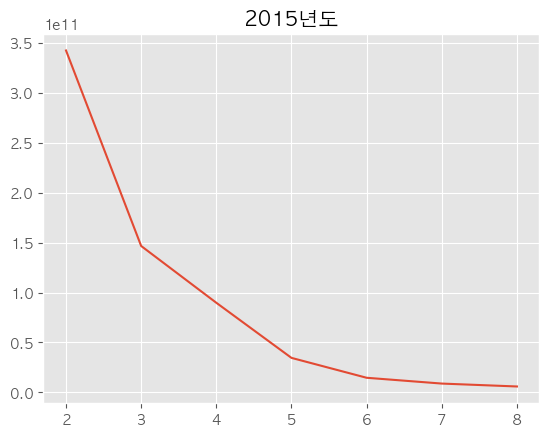

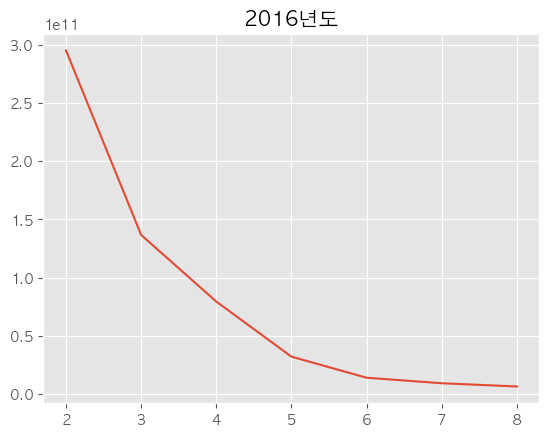

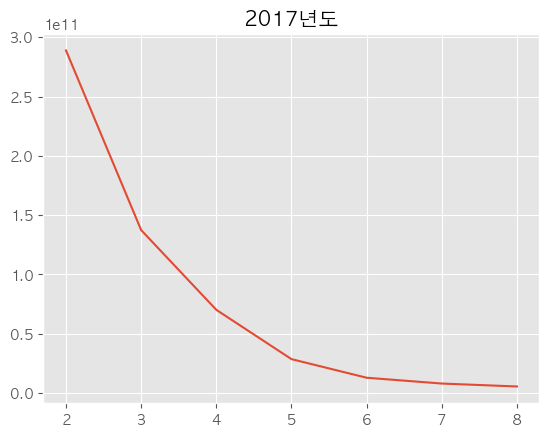

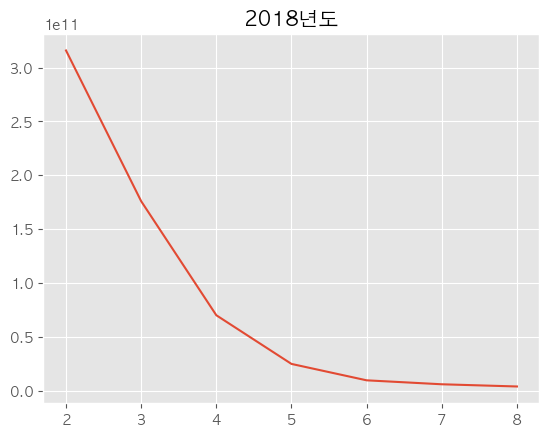

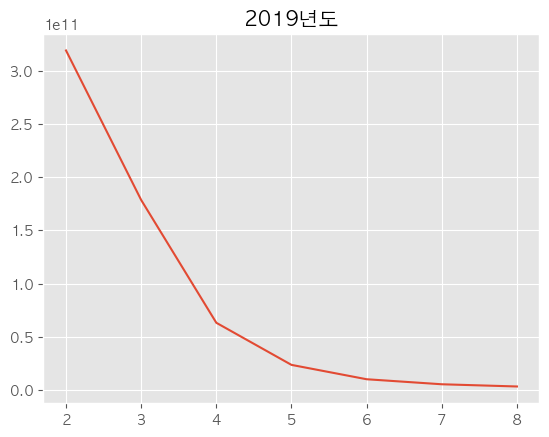

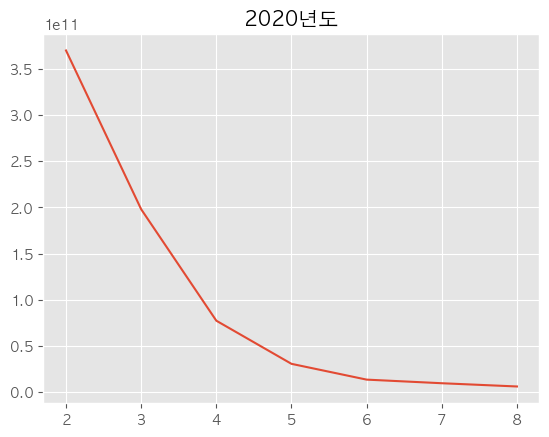

In [65]:
# kmtotal1 = total2[['년도', '출생아수', '산부인과의원수', '초등학생인원수']]
kmtotal1 = total2[['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수']]

scores = []
for year in list(kmtotal1[kmtotal1['년도']>=2015]['년도'].unique()):
    for k in range(2,9): 
        km = KMeans(n_clusters=k)
        km.fit(kmtotal1[kmtotal1['년도']==year])
        scores.append(km.inertia_)
    plt.plot(range(2,9), scores)
    plt.title('%d년도'%year)
    plt.show()
    scores=[]

In [66]:
len(scores)

0

In [67]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(kmtotal1)
km.labels_

array([1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

In [68]:
checkKmTotal1 = kmtotal1.copy()
checkKmTotal1['cluster_id'] = km.labels_

In [69]:
checkKmTotal1.sort_values(by='cluster_id', ascending=False)

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,cluster_id
135,2020,65909,3468,7,29487,2
64,2016,229883,12436,47,85939,2
62,2016,155812,10910,32,65629,2
61,2016,237337,13980,22,92981,2
60,2016,271446,17302,46,115309,2
...,...,...,...,...,...,...
92,2018,318671,16079,54,129290,0
87,2018,395524,21224,59,191016,0
39,2015,463685,25491,65,157099,0
38,2015,364364,19438,85,129583,0


In [70]:
df = checkKmTotal1[checkKmTotal1['년도']==2020]
df

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,cluster_id
119,2020,1984199,77737,265,761731,1
120,2020,1642977,47445,385,409536,1
121,2020,419997,16823,59,190849,0
122,2020,506176,15058,67,153527,0
123,2020,364083,11193,87,122587,0
124,2020,460304,16040,60,156928,0
125,2020,257577,8165,48,94661,2
126,2020,334679,12873,53,129079,0
127,2020,232246,7318,36,86419,2
128,2020,286386,11950,43,120115,2


In [71]:
list(df.columns)

['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', 'cluster_id']

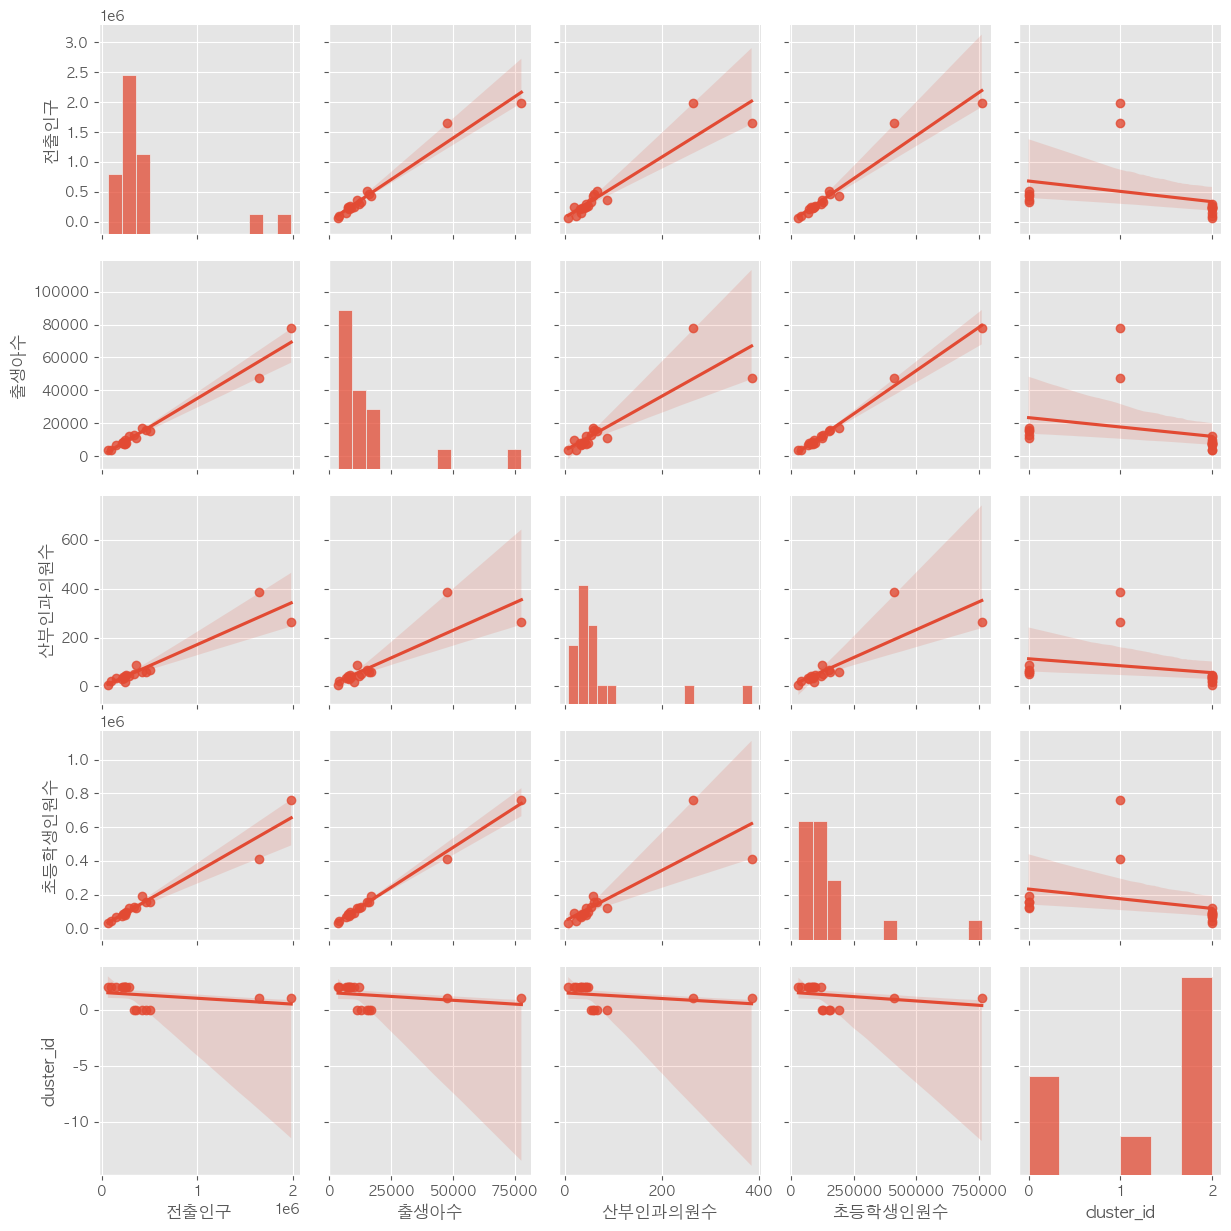

In [72]:
sns.pairplot(
    df,
    vars = ['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', 'cluster_id'],
    kind = 'reg'
)

plt.show()

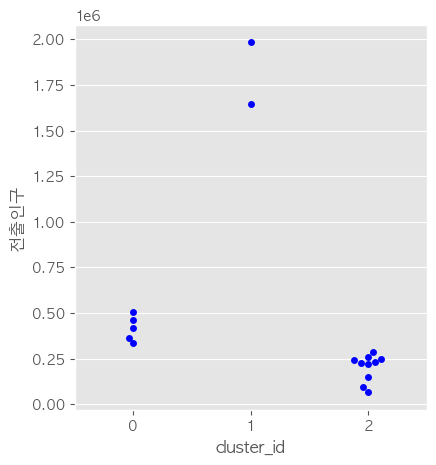

In [73]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
sns.swarmplot(
    y = checkKmTotal1[checkKmTotal1['년도']==2020]['전출인구'],
    x = checkKmTotal1[checkKmTotal1['년도']==2020]['cluster_id'],
    data = checkKmTotal1,
    ax = ax1,
    color='blue'
    # palette = 'Set1'
    # hue = 'class',
)
# ax2 = ax1.twinx() 
# sns.swarmplot(
#     y = checkKmTotal1[checkKmTotal1['년도']==2020]['산부인과의원수'],
#     x = checkKmTotal1[checkKmTotal1['년도']==2020]['cluster_id'],
#     data = checkKmTotal1,
#     ax = ax2,
#     color='red'
#     )
# ax3 = ax2.twinx() 
# sns.swarmplot(
#     y = checkKmTotal1[checkKmTotal1['년도']==2020]['전출인구'],
#     x = checkKmTotal1[checkKmTotal1['년도']==2020]['cluster_id'],
#     data = checkKmTotal1,
#     ax = ax3,
#     color='green'
#     )

plt.show()

<AxesSubplot: xlabel='cluster_id', ylabel='전출인구'>

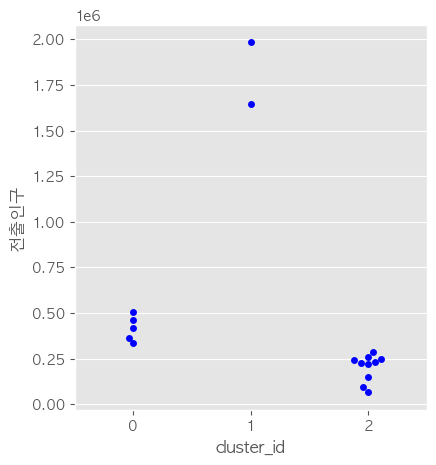

In [74]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
sns.swarmplot(
    y = checkKmTotal1[checkKmTotal1['년도']==2020]['전출인구'],
    x = checkKmTotal1[checkKmTotal1['년도']==2020]['cluster_id'],
    data = checkKmTotal1,
    ax = ax1,
    color='blue'
)

In [75]:
justOnlyScatterText = total2[['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수','시도']]
justOnlyScatterText['cluster_id'] = km.labels_
justOnlyScatterText

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,시도,cluster_id
0,2013,1821303,112129,286,739619,경기도,1
1,2013,1620640,84066,395,469392,서울특별시,1
2,2013,423864,29504,65,190166,경상남도,0
3,2013,496161,25831,82,160821,부산광역시,0
4,2013,363224,19340,86,136309,대구광역시,0
...,...,...,...,...,...,...,...
131,2020,226441,8607,40,85135,충청북도,2
132,2020,243418,7481,44,79807,대전광역시,2
133,2020,217897,7835,32,73478,강원도,2
134,2020,94736,3989,23,40575,제주특별자치도,2


In [76]:
justOnlyScatterText2020 = justOnlyScatterText[justOnlyScatterText['년도']==2020]

In [77]:
justOnlyScatterText2020.reset_index(drop=True,inplace=True)
justOnlyScatterText2020

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,시도,cluster_id
0,2020,1984199,77737,265,761731,경기도,1
1,2020,1642977,47445,385,409536,서울특별시,1
2,2020,419997,16823,59,190849,경상남도,0
3,2020,506176,15058,67,153527,부산광역시,0
4,2020,364083,11193,87,122587,대구광역시,0
5,2020,460304,16040,60,156928,인천광역시,0
6,2020,257577,8165,48,94661,전라북도,2
7,2020,334679,12873,53,129079,경상북도,0
8,2020,232246,7318,36,86419,광주광역시,2
9,2020,286386,11950,43,120115,충청남도,2


In [78]:
# 그래프에 텍스트와 Color 
plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
sns.swarmplot(
    y = justOnlyScatterText2020['전출인구'],
    x = justOnlyScatterText2020['cluster_id'],
    data = justOnlyScatterText2020,
    ax = ax,
    # color='blue'
)

#
# for n in range(3):
#     plt.text(
#         justOnlyScatterText2020['전출인구'][n] * 1.02, # << *1.02는 Point를 가리니까 임의값으로 대충 2% 띄우려고 적은거임
#         justOnlyScatterText2020['cluster_id'][n] * 0.98,
#         justOnlyScatterText['시도'][n],
#         fontsize=15,
#     )
plt.show()

<Figure size 1500x1000 with 0 Axes>

In [79]:
checkKmTotal1

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,cluster_id
0,2013,1821303,112129,286,739619,1
1,2013,1620640,84066,395,469392,1
2,2013,423864,29504,65,190166,0
3,2013,496161,25831,82,160821,0
4,2013,363224,19340,86,136309,0
...,...,...,...,...,...,...
131,2020,226441,8607,40,85135,2
132,2020,243418,7481,44,79807,2
133,2020,217897,7835,32,73478,2
134,2020,94736,3989,23,40575,2


In [80]:
total3 = pd.read_csv('../Data/02.통합.csv', index_col=0)

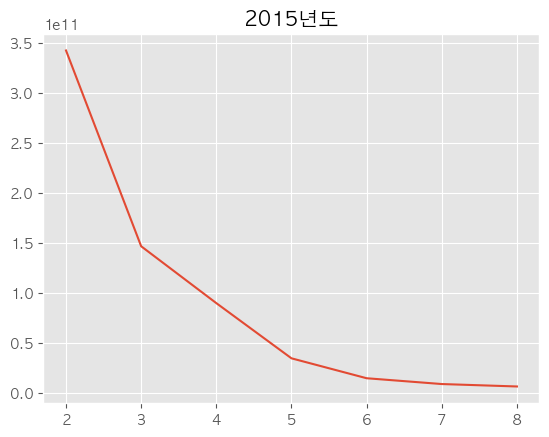

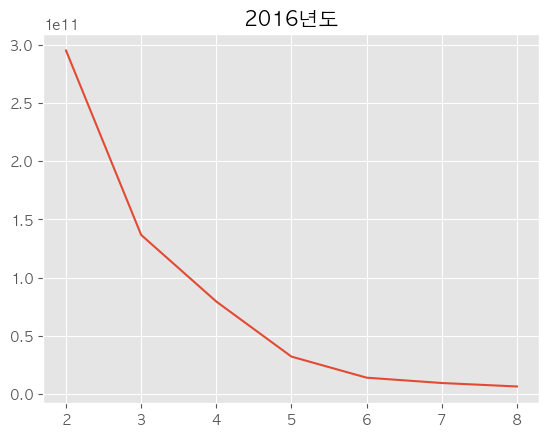

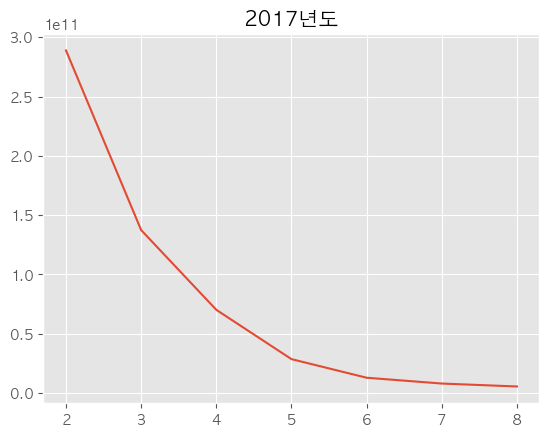

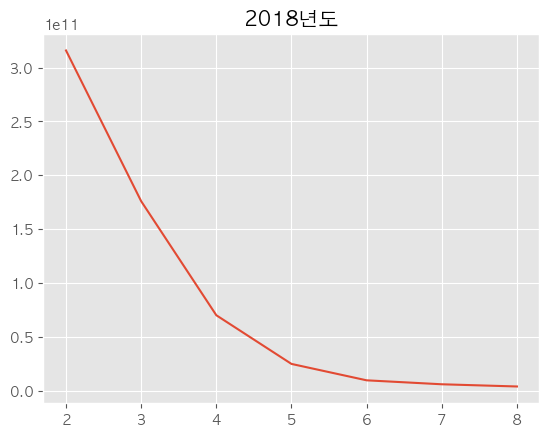

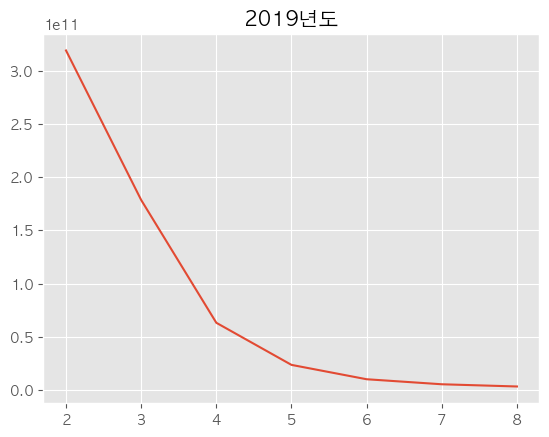

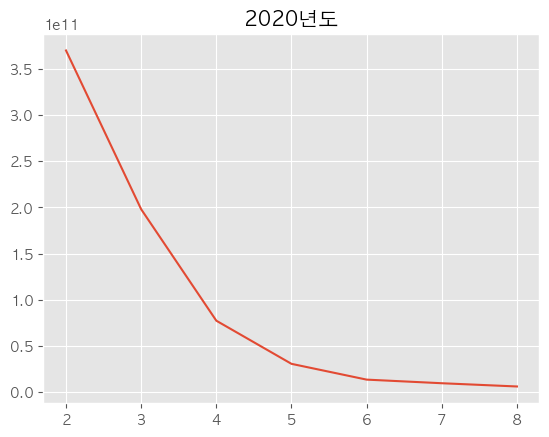

In [81]:
# kmtotal1 = total2[['년도', '출생아수', '산부인과의원수', '초등학생인원수']]
kmtotal1 = total2[['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수']]

scores = []
for year in list(kmtotal1[kmtotal1['년도']>=2015]['년도'].unique()):
    for k in range(2,9): 
        km = KMeans(n_clusters=k)
        km.fit(kmtotal1[kmtotal1['년도']==year])
        scores.append(km.inertia_)
    plt.plot(range(2,9), scores)
    plt.title('%d년도'%year)
    plt.show()
    scores=[]

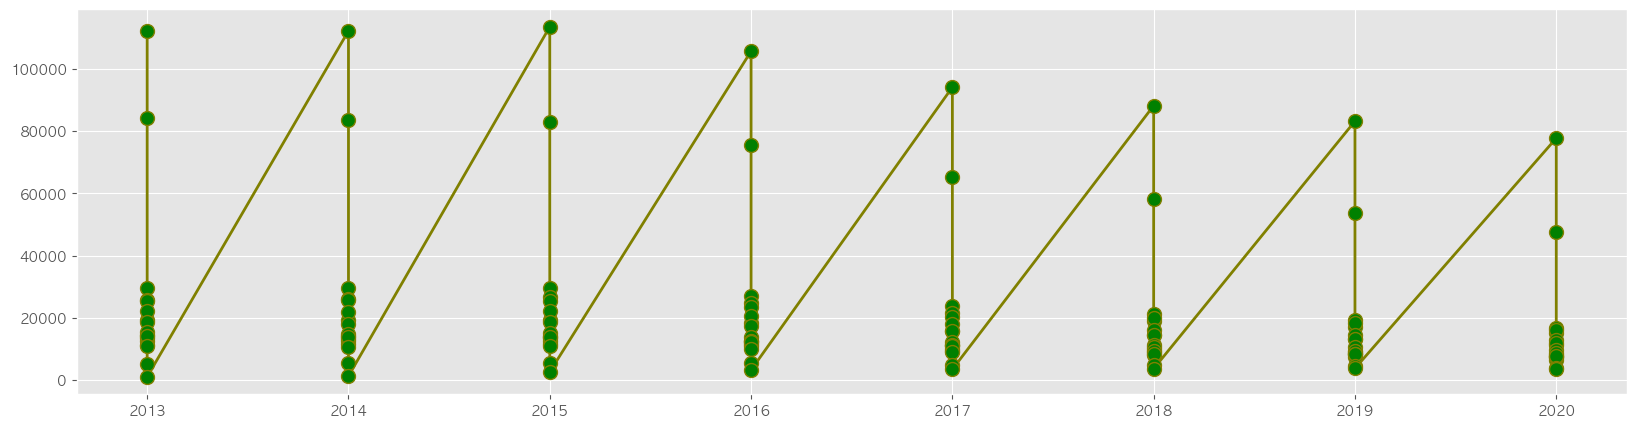

In [82]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(
    total3['년도'],
    total3['출생아수'],
    marker="o",
    markerfacecolor="green",
    markersize=10,
    color="olive",
    linewidth=2,
)

In [83]:
total3[total3['빈집수'].isna()]

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,빈집수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,NaN,7235,49143,6822,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,NaN,6229,48097,4749,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,NaN,1933,12612,1530,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,NaN,2093,13902,1510,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,NaN,1301,9981,1188,46578.5,37541.7
5,2013,인천광역시,2879782,439578,25560,69,157918,NaN,1769,11522,1192,62378.3,31197.4
6,2013,전라북도,1872965,260395,14555,52,105135,NaN,974,6935,732,22597.6,15924.7
7,2013,경상북도,2699440,330983,22206,57,135237,NaN,1361,9127,987,28452.3,35242.6
8,2013,광주광역시,1472910,229288,12729,45,96055,NaN,1086,6342,775,23082.8,18041.6
9,2013,충청남도,2047631,268053,18628,47,116216,NaN,1171,7662,854,26445.4,17957.6


In [84]:
tongtong = pd.read_csv('../Data/03.통합.csv', index_col=0)

In [85]:
list(tongtong['시도'].unique())

['경기도',
 '서울특별시',
 '경상남도',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '전라북도',
 '경상북도',
 '광주광역시',
 '충청남도',
 '전라남도',
 '울산광역시',
 '충청북도',
 '대전광역시',
 '강원도',
 '제주특별자치도',
 '세종특별자치시']

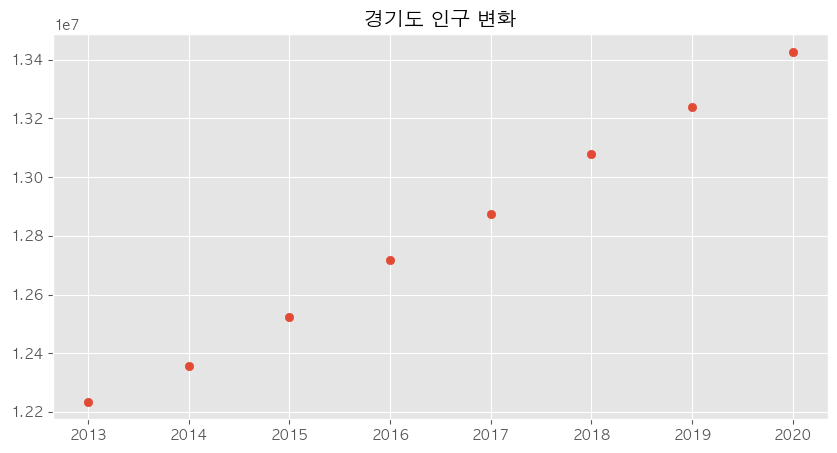

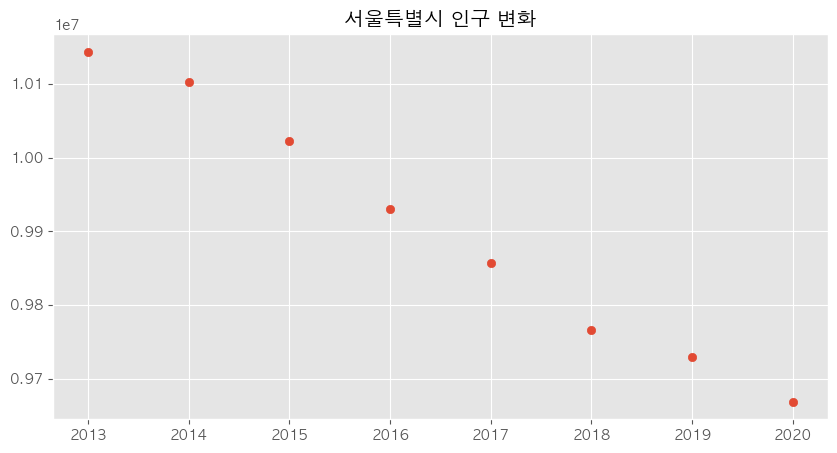

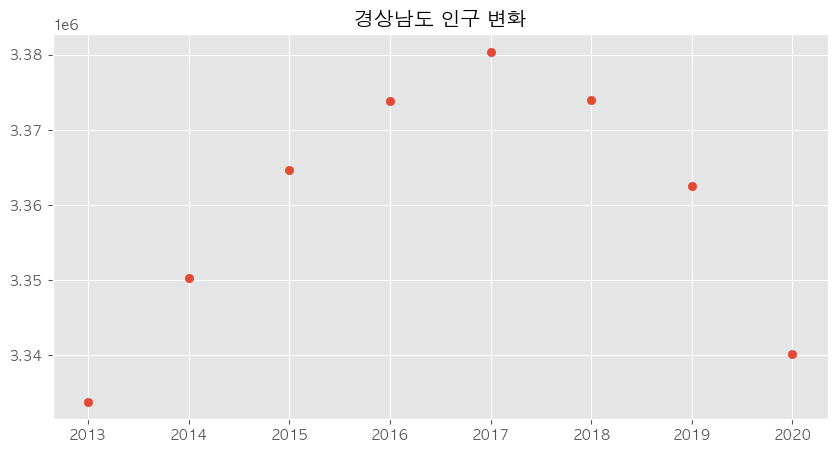

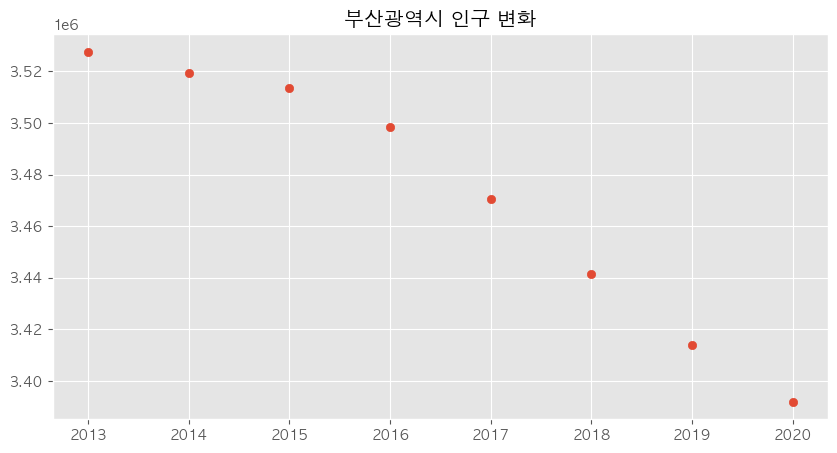

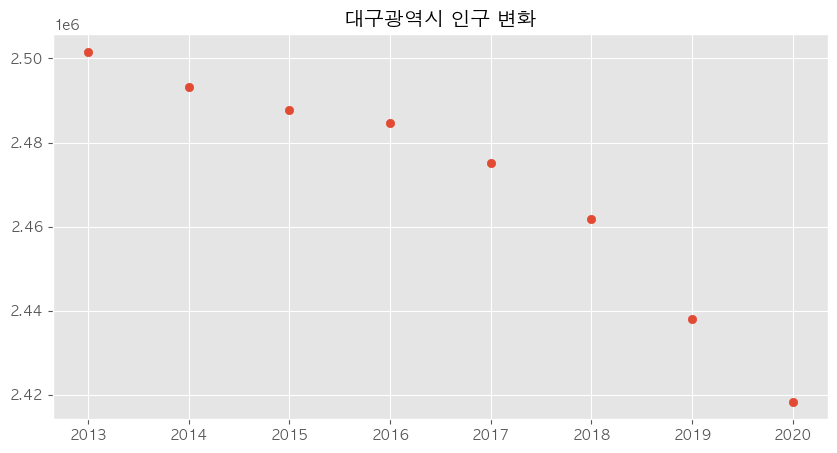

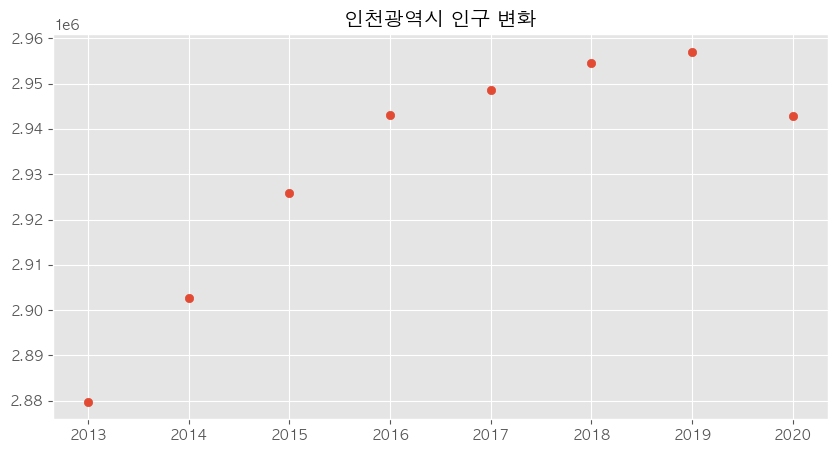

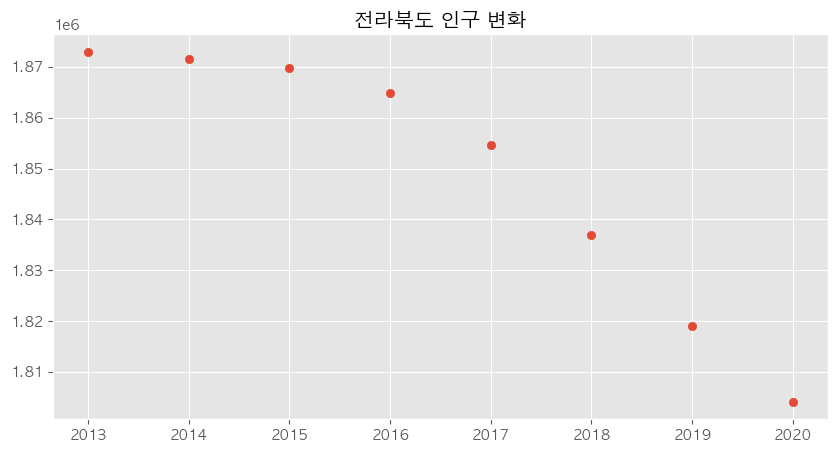

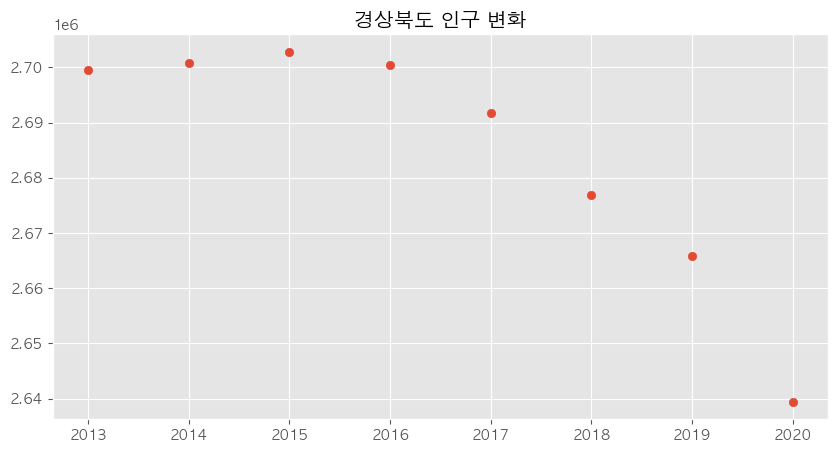

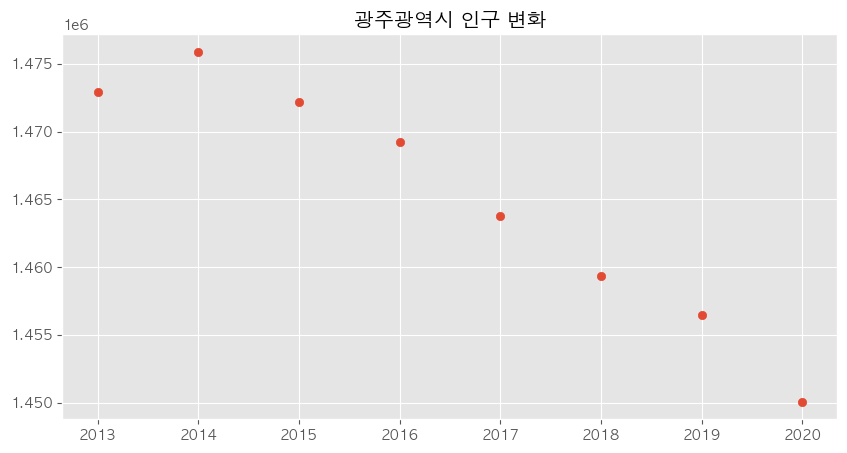

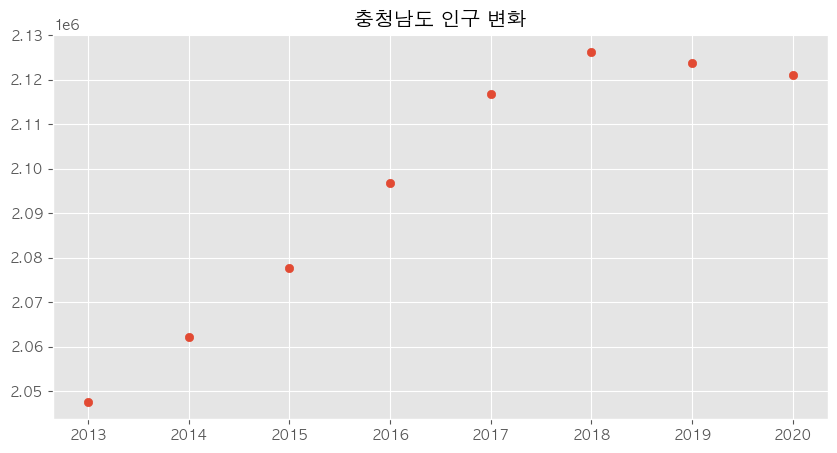

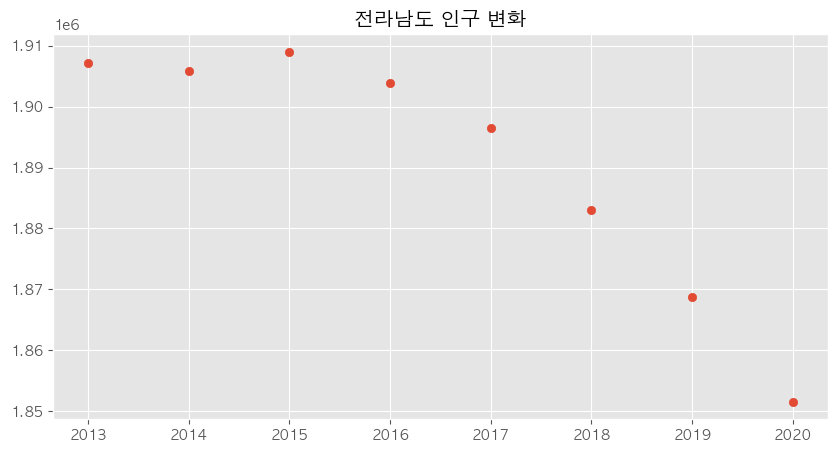

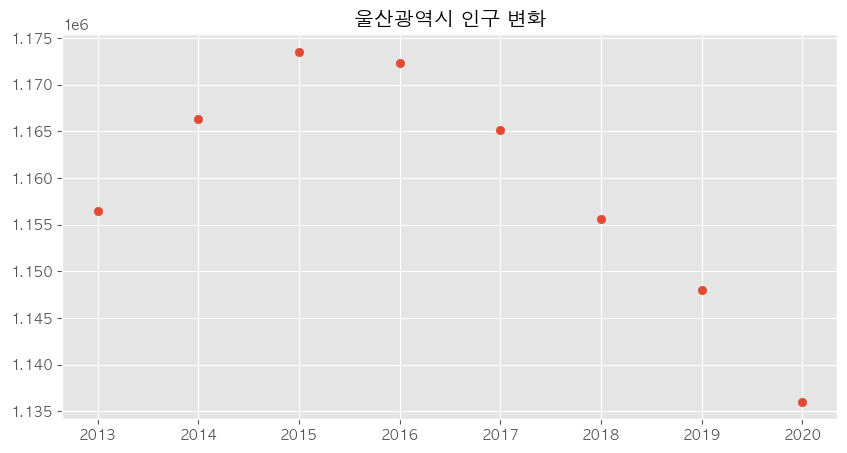

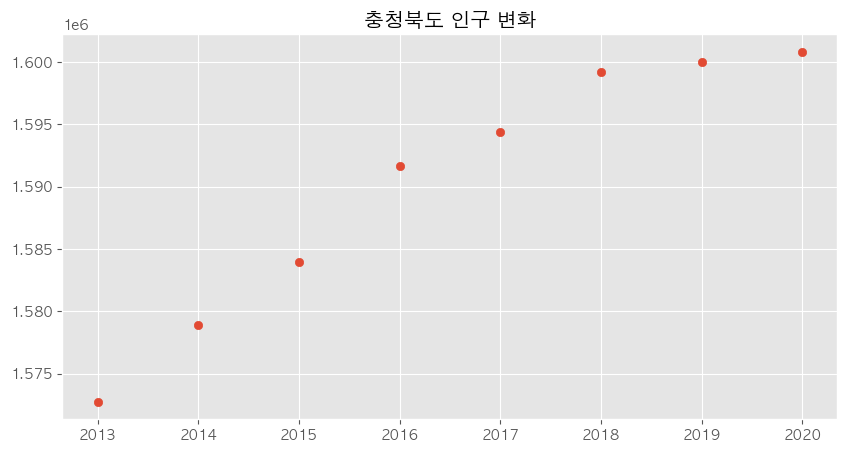

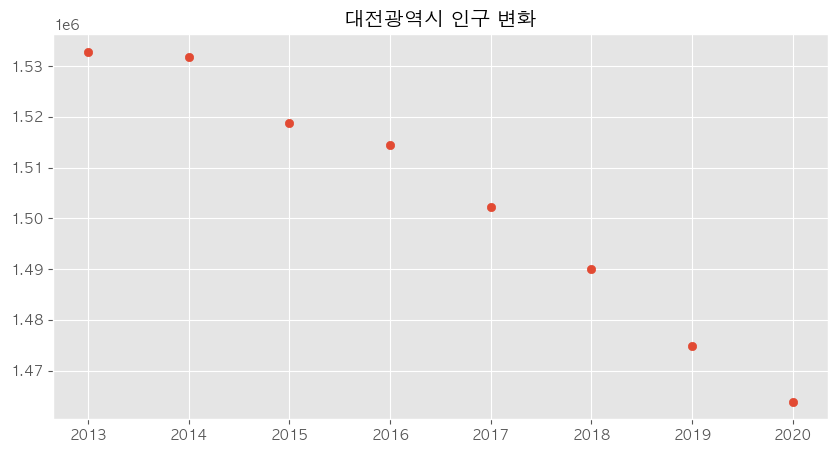

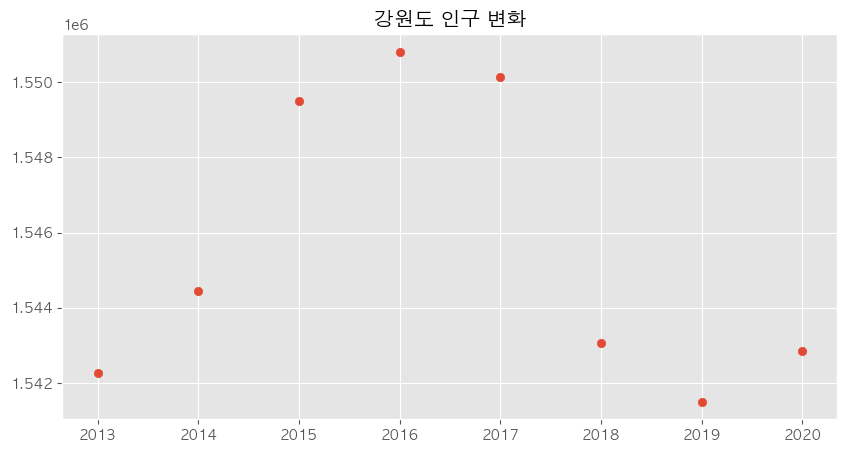

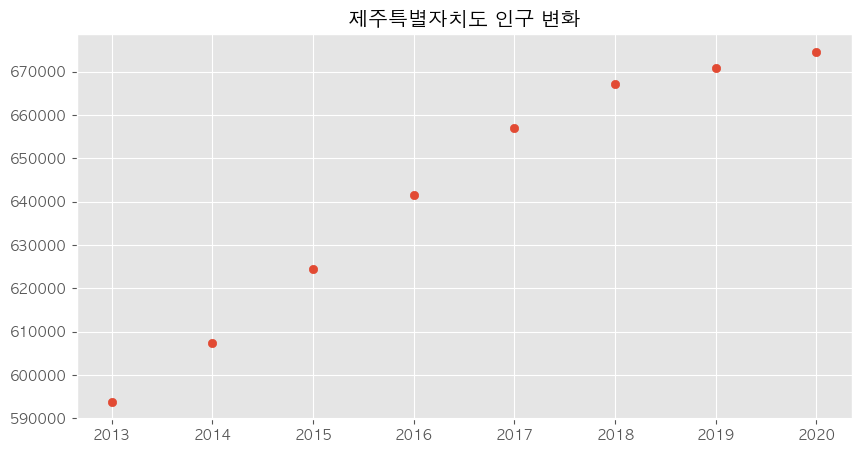

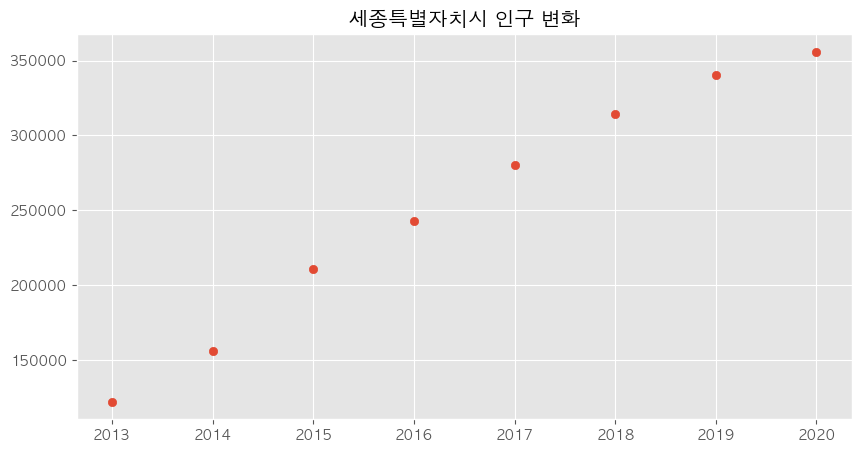

In [86]:
area = list(tongtong['시도'].unique())
for sido in area:
    plt.figure(figsize=(10,5))
    plt.scatter(
        tongtong[tongtong['시도']==sido].index, 
        tongtong[tongtong['시도']==sido]['총인구'],#< target
        )
    plt.title('%s 인구 변화'%sido)
    plt.show()

In [87]:
colors = ['red','green','blue','firebrick','black','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
len(colors)

14

In [88]:
# tongtong['시도'].unique()
letDoIt = tongtong[['시도','총인구']]
sudogwon = letDoIt[(letDoIt['시도']=='경기도') | (letDoIt['시도']=='서울특별시')| (letDoIt['시도']=='인천광역시')]
bisudogwon= letDoIt[(letDoIt['시도']!='경기도') & (letDoIt['시도']!='서울특별시')& (letDoIt['시도']!='인천광역시')]
sudogwon = sudogwon.pivot_table('총인구',index=sudogwon.index, aggfunc=sum)
bisudogwon = bisudogwon.pivot_table('총인구',index=bisudogwon.index, aggfunc=sum)
chongIngu = pd.concat([sudogwon,bisudogwon], axis=1)
chongIngu.columns=['수도권 총인구','비수도권 총인구']

In [89]:
chongIngu

,수도권 총인구,비수도권 총인구
년도,,
2013,25258057,25883406
2014,25363671,25964245
2015,25470602,26058736
2016,25590465,26105751
2017,25679863,26098681
2018,25797418,26028641
2019,25925799,25924062
2020,26038307,25790716


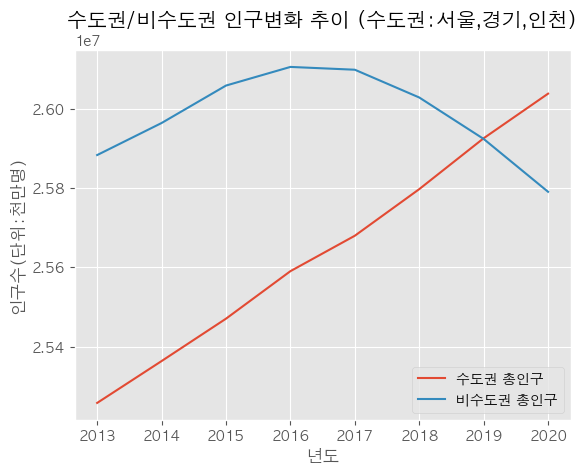

In [90]:
plt.style.use("ggplot")
chongIngu.plot(
)
plt.title('수도권/비수도권 인구변화 추이 (수도권:서울,경기,인천)')
plt.ylabel('인구수(단위:천만명)')
plt.show()

In [106]:
tongtong = pd.read_csv('../Data/04.통합.csv', index_col=0)
tongtong


,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인
년도,,,,,,,,,,
2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,351074
2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,325766
2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,69628
2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,39010
2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,24076
...,...,...,...,...,...,...,...,...,...,...
2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,57094
2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,22928
2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,24654


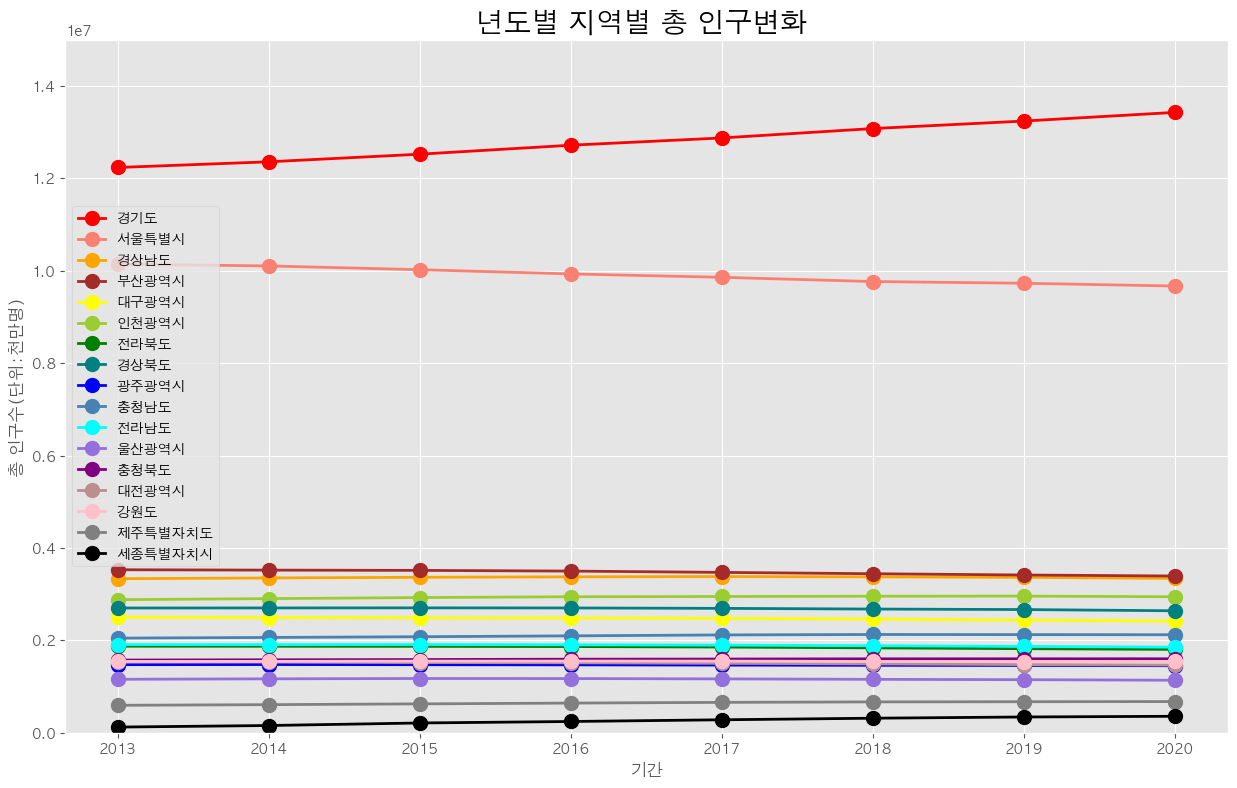

In [110]:
plt.style.use("ggplot")
colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue',
           'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray', 'black']
area = list(tongtong['시도'].unique())
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1,1,1)
i=0
for sido in area:
    ax.plot(
        tongtong[tongtong['시도']==sido].index,
        tongtong[tongtong['시도']==sido]['총인구'],
        marker="o",
        color=colors[i],
        markersize=10,
        linewidth=2,
        label=sido
    )
    i +=1

ax.legend(loc="center left")
# ax.legend(loc="best")
ax.set_title("년도별 지역별 총 인구변화 ", size=20)
ax.set_xlabel("기간", size=12)
ax.set_ylabel("총 인구수(단위:천만명)", size=12)
ax.set_ylim(0,15000000)
# ax.set_xticklabels(df_3.columns, rotation=90)

plt.show()

In [92]:
tonghab4 = pd.read_csv('../Data/04.통합.csv')

In [93]:
list(tonghab4.columns)

['년도',
 '시도',
 '총인구',
 '전출인구',
 '출생아수',
 '산부인과의원수',
 '초등학생인원수',
 '도매 및 소매업 신생',
 '예금은행대출금액',
 '예금액',
 '외국인']

In [94]:
tongtong = tonghab4[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생']]
tongtong2 = tonghab4[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생','외국인']]

In [95]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(tongtong2)
km.labels_

array([1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [96]:
tongtong2['cluster_id'] = km.labels_

In [97]:
tongtong[['년도','시도']] = tonghab4[['년도','시도']]
tongtong2[['년도','시도']] = tonghab4[['년도','시도']]

In [98]:
tongtong

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,년도,시도
0,1821303,112129,286,739619,49143,2013,경기도
1,1620640,84066,395,469392,48097,2013,서울특별시
2,423864,29504,65,190166,12612,2013,경상남도
3,496161,25831,82,160821,13902,2013,부산광역시
4,363224,19340,86,136309,9981,2013,대구광역시
...,...,...,...,...,...,...,...
131,226441,8607,40,85135,6103,2020,충청북도
132,243418,7481,44,79807,6405,2020,대전광역시
133,217897,7835,32,73478,5554,2020,강원도
134,94736,3989,23,40575,2856,2020,제주특별자치도


In [99]:
tongtong2

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,외국인,cluster_id,년도,시도
0,1821303,112129,286,739619,49143,351074,1,2013,경기도
1,1620640,84066,395,469392,48097,325766,1,2013,서울특별시
2,423864,29504,65,190166,12612,69628,2,2013,경상남도
3,496161,25831,82,160821,13902,39010,2,2013,부산광역시
4,363224,19340,86,136309,9981,24076,2,2013,대구광역시
...,...,...,...,...,...,...,...,...,...
131,226441,8607,40,85135,6103,57094,0,2020,충청북도
132,243418,7481,44,79807,6405,22928,0,2020,대전광역시
133,217897,7835,32,73478,5554,24654,0,2020,강원도
134,94736,3989,23,40575,2856,26831,0,2020,제주특별자치도


In [100]:
tongtong = tongtong[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', 'cluster_id']]

KeyError: "['cluster_id'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
columns = tongtong.columns
columns

Index(['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', 'cluster_id'], dtype='object')

In [ ]:
dfScaled = scaler.fit_transform(tongtong)
dfScaled = pd.DataFrame(dfScaled)
dfScaled.columns = columns
# dfScaled['cluster_ID'] = km.labels_
# dfScaled.set_index(keys=List, inplace=True)

In [ ]:
dfScaled

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,cluster_id
0,0.917273,0.987845,0.722646,0.960500,0.776750,0.5
1,0.815367,0.738139,1.000000,0.606175,0.760073,0.5
2,0.207586,0.252643,0.160305,0.240051,0.194295,1.0
3,0.244302,0.219960,0.203562,0.201574,0.214863,1.0
4,0.176790,0.162203,0.213740,0.169433,0.152346,1.0
...,...,...,...,...,...,...
131,0.107325,0.066700,0.096692,0.102333,0.090515,0.0
132,0.115946,0.056681,0.106870,0.095347,0.095330,0.0
133,0.102986,0.059831,0.076336,0.087049,0.081762,0.0
134,0.040438,0.025609,0.053435,0.043906,0.038744,0.0


In [ ]:
list(dfScaled.columns)

['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', 'cluster_id']

In [ ]:
featureNames = ['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생']
targetName = ['cluster_id']

featrue = dfScaled[featureNames]
target = dfScaled[targetName]

In [ ]:
featrue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   전출인구         136 non-null    float64
 1   출생아수         136 non-null    float64
 2   산부인과의원수      136 non-null    float64
 3   초등학생인원수      136 non-null    float64
 4   도매 및 소매업 신생  136 non-null    float64
dtypes: float64(5)
memory usage: 5.4 KB


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cluster_id  136 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


In [ ]:
trainData, testData, trainTarget, testTarget = train_test_split(featrue, target, test_size=0.2) 

In [ ]:
# 잘 짤라졌나 확인 
print(trainData.shape)
print(testData.shape)
print(trainTarget.shape)
print(testTarget.shape)

(108, 5)
(28, 5)
(108, 1)
(28, 1)


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(trainData, trainTarget, test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(86, 5)
(22, 5)
(86, 1)
(22, 1)


In [ ]:
from sklearn.model_selection import cross_validate # 
from sklearn.ensemble import RandomForestRegressor ## Regressor!

In [ ]:
rf = RandomForestRegressor(n_jobs = -1)
scores = cross_validate(rf, x_train, y_train, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 0.9988809757253317 0.9953617382816933

/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib

0.9988622557388055 0.9936267089167281
